In [29]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/maksimtrebusinin/Downloads/out.csv')
df

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


In [4]:
df.isna().sum()

url                        1
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         1
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545300
domain_age_days       750689
dtype: int64

In [6]:
df.drop('whois_data', axis=1, inplace=True)

In [8]:
df['domain_age_days']

0           8250.0
1          10106.0
2           8111.0
3           5542.0
4           5098.0
            ...   
2499995        NaN
2499996        NaN
2499997        NaN
2499998     4622.0
2499999        NaN
Name: domain_age_days, Length: 2500000, dtype: float64

In [9]:
df = df.fillna(value=-1)

In [17]:
for col in df.select_dtypes(include=['object']):
    df[col], _ =pd.factorize(df[col])

In [27]:
def metrics(y_true, y_pred):
    print(f'MAE is: {mean_absolute_error(y_true,y_pred)}')
    print(f'R2_score is: {r2_score(y_true,y_pred)}')

    mat=confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(mat, annot=True, fmt='.2g')
    plt.show()
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 int64  
 1   source              int64  
 2   label               int64  
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  domain_age_days     float64
dtypes: bool(4), float64(4), int64(9)
memory usage: 257.5 MB


In [22]:
df.label.value_counts()

0    1250000
1    1250000
Name: label, dtype: int64

In [23]:
X,y=df.drop('label',axis=1), df.label

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [24]:
model_bag=BaggingClassifier()
model_bag.fit(X_train, y_train)

BaggingClassifier()

MAE is: 0.0
R2_score is: 1.0


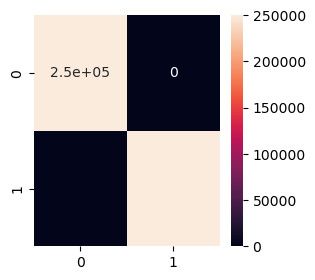

In [28]:
y_pred_bagging=model_bag.predict(X_test)
metrics(y_test,y_pred_bagging)